Use the code explained in class to visualize the electric field created by a semi-circular capacitor, that has half of a circle uniformly charged with positive charge, and the other half with negative charge. This situation can be simulated by using discrete charges placed in a circular pattern. Choose, for example, 10 positive unit charges equally spaced on half of the circle, and 10 negative charges on the other half. What is the magnitude and direction of the electric field at the origin, if the circle has a radius of 1 cm, and charges have the magnitude of $1.0 \mu$C. To answer this question: (1) find the grid point closest to the origin and the corresponding electric field, and (2) convert the result from simulation units to physical units.

Show all work in a jupyter notebook.

---------
### Solution

In [1]:
import numpy as np, matplotlib.pyplot as pl

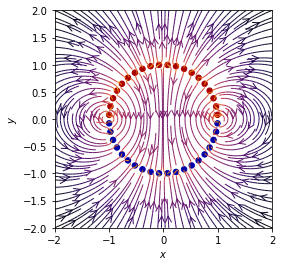

In [8]:
def E_field(q, x0, y0, x, y):
    den = np.hypot(x - x0, y - y0)**3
    return q*(x-x0)/den, q*(y-y0)/den

nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

nq = 20
charges = []
for i in range(nq):
   charges.append((1, np.cos(np.pi*(i+0.5)/nq), np.sin(np.pi*(i+0.5)/nq)))
for i in range(nq):
   charges.append((-1, np.cos(np.pi*(i+0.5)/nq+np.pi), np.sin(np.pi*(i+0.5)/nq+np.pi)))

Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E_field(charge[0], charge[1], charge[2], X, Y)
    Ex += ex
    Ey += ey
color = 2 * np.log(np.hypot(Ex, Ey))

pl.streamplot(x, y, Ex, Ey, 
              color=color, linewidth=1, cmap=pl.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

charge_color = lambda q: "#aa0000" if q >0 else "#0000aa"
ax = pl.gca()
from matplotlib.patches import Circle

# Add filled circles for the charges themselves
for q in charges:
    ax.add_artist(Circle((q[1], q[2]), 0.05, color=charge_color(q[0])))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')

grid point (32, 32)

In [9]:
(X[32,32], Y[32,32])

(0.03174603174603163, 0.03174603174603163)

In [6]:
X[32,32]

0.03174603174603163

electric field components at the grid point closest to the origin

In [10]:
(Ex[32,32], Ey[32,32])

(-0.051732615342848565, -25.52955501170264)

The conversion factor is 
$$ [k_e (\mu C)^2/(\mbox{cm}^2)]/[N/C]$$ 

where $k_e$ is the Coulomb electric constant.

In [11]:
factor = 8.9875517923e9*(1.e-6**2)/(0.01**2)

In [12]:
np.hypot(Ex[32,32], Ey[32,32])*factor

2294.4866898413507

The electric field at the origin is approximately 1151 N/C and pointing south.